In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from IPython.core.pylabtools import figsize
from jedi.plugins.django import mapping

Del archivo fve32.mat

In [18]:
math_path = r"C:\Users\karim\OneDrive\Documentos\Python Scripts\fve32.mat"
math_data = scipy.io.loadmat(math_path)
math_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Names', 'CIJ'])

1. Muestra el heatmap de la matriz de activación

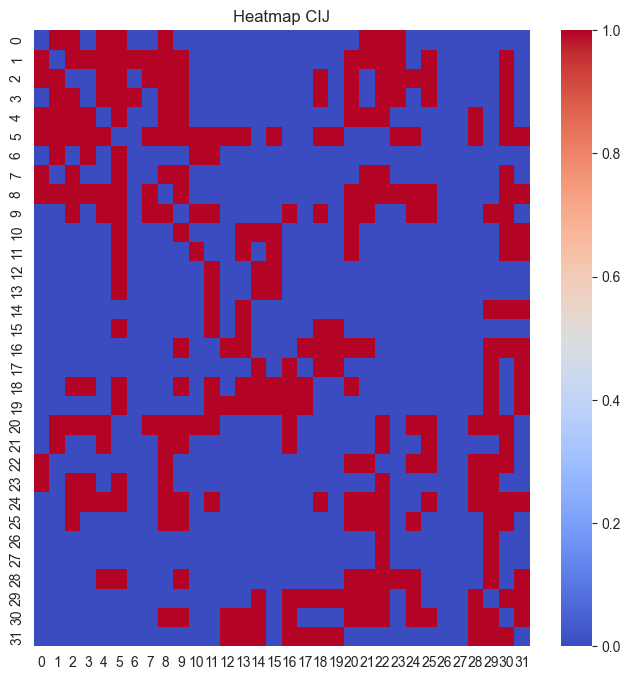

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

names = math_data["Names"]
cij_matrix = math_data["CIJ"]
names_type, names_shape = type(names), names.shape
cij_type, cij_shape = type(cij_matrix), cij_matrix.shape
names_list = [str(name[0]) for name in names]
plt.figure(figsize=(8,8))
sns.heatmap(cij_matrix,vmin=0,vmax=1,cmap="coolwarm")
plt.title("Heatmap CIJ")
plt.show()

2. Utilizando los nombres del archivo.mat, muestra el grafo en 4 formas distintas (shell debe ser una de ellas)

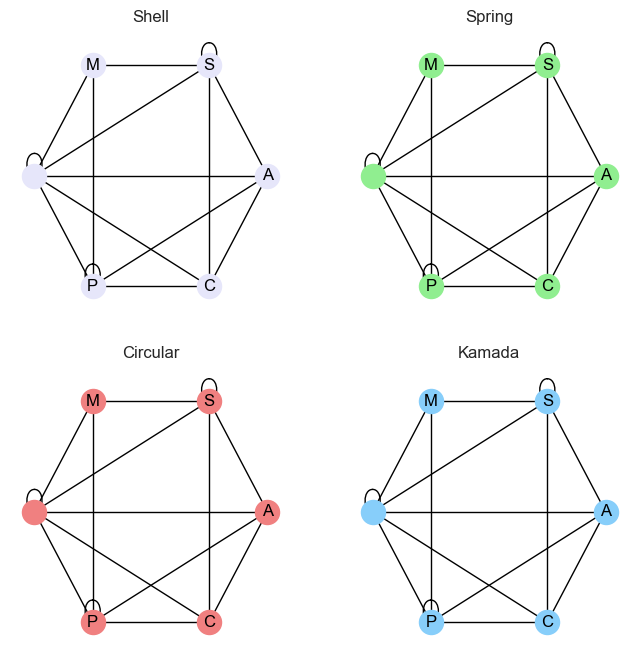

<Figure size 640x480 with 0 Axes>

In [20]:
import networkx as nx
G = nx.from_numpy_array(cij_matrix)
mapping = {i : names_list[i] for i in range(len(names_list))}
G = nx.relabel_nodes(G, mapping)
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
nx.draw_shell(G, with_labels=True, node_color="lavender")
plt.title("Shell")

plt.subplot(2,2,2)
nx.draw_shell(G, with_labels=True, node_color="lightgreen")
plt.title("Spring")

plt.subplot(2,2,3)
nx.draw_shell(G, with_labels=True, node_color="lightcoral")
plt.title("Circular")

plt.subplot(2,2,4)
nx.draw_shell(G, with_labels=True, node_color="lightskyblue")
plt.title("Kamada")

plt.show()
plt.tight_layout()

3. Determina el nodo con mayores conexiones

In [21]:
grados = np.sum(cij_matrix,axis=1)
max_index = np.argmax(grados)
max_node = names_list[max_index]
max_value = grados[max_index]

max_node, max_value

(' ', np.uint64(20))

4. Muestra el grado solo destacando las conexiones del nodo encontrado en el ejercicio anterior

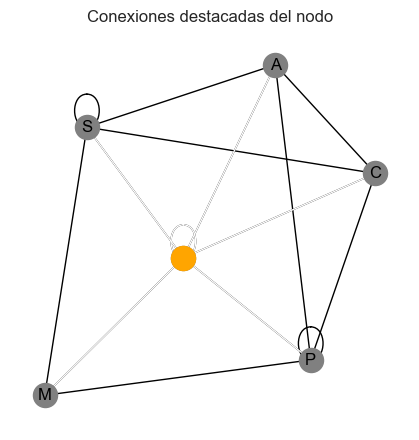

In [22]:
G = nx.from_numpy_array(cij_matrix)
mapping = {i : names_list [i] for i in range(len(names_list))}
G = nx.relabel_nodes(G, mapping)

connections = list(G.edges(max_node))
plt.figure(figsize=(4,4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="gray")

nx.draw_networkx_nodes(G, pos, nodelist=[max_node], node_color="orange")
nx.draw_networkx_edges(G, pos, edgelist = connections, edge_color="white")
plt.title(f"Conexiones destacadas del nodo")
plt.show()